# Bike Sharing Demand

- 도시 자전거 공유 시스템 사용 예측
- [캐글](https://www.kaggle.com)의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 bike_train.csv bike_test.csv로 저장 
https://www.kaggle.com/code/kwonyoung234/for-beginner

## 1. 문제 정의
- 자전거 대여량을 예측하는 문제
- Evaluation : Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). 

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

## 2. 데이터 가져오기

In [10]:
train = pd.read_csv('./datasets/bike-sharing-demand/train.csv')

In [11]:
test = pd.read_csv('./datasets/bike-sharing-demand/test.csv')

## 3. 데이터 훑어보기

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

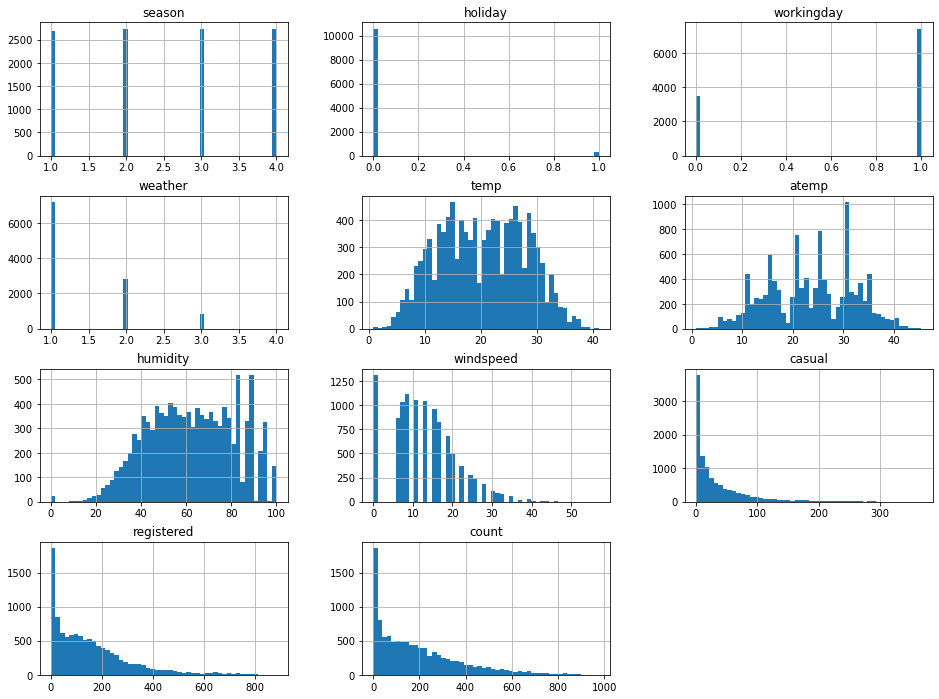

In [7]:
bike_train.hist(bins=50, figsize=(16,12))

datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


**데이터 전처리 및 시각화**

In [28]:
train['tmpDate'] = train.datetime.apply(lambda x:x.split())
train['year'] = train.tmpDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tmpDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tmpDate.apply(lambda x:x[0].split('-')[2])

train['weekday'] = train.tmpDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], '%Y-%m-%d').weekday()])
train['hour'] = train.tmpDate.apply(lambda x:x[1].split(':')[0])

In [29]:
train['year'] = pd.to_numeric(train.year)
train['month'] = pd.to_numeric(train.month)
train['day'] = pd.to_numeric(train.day)
train['hour'] = pd.to_numeric(train.hour)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tmpDate     10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [31]:
train.drop('tmpDate', axis=1, inplace=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  weekday     10886 non-null  object 
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [23]:
## 4. 데이터 탐색

### 4.1 타깃값(count) 의 분포도 그려보기

<AxesSubplot:xlabel='temp', ylabel='count'>

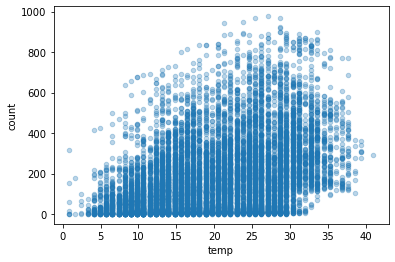

In [9]:
bike_train.plot(kind = 'scatter', x='temp', y='count', alpha=0.3)

- x축은 타깃값 count, y축은 빈도수(횟수)
- 오른쪽으로 꼬리가 긴 분포
- 회귀 모델이 좋은 성능 내려면 데이터가 정규분포를 따르는게 좋음
- 따라서 타깃값으 정규분포에 가깝게 만들기 위해 로그 변환 사용

### 4.2 대여 시간대(년, 월, 일, 요일, 시간, 분) 에 따른 자전거 대여율
범주형 데이터에 따른 수치형 데이터의 평균값(막대그래프)

<AxesSubplot:xlabel='hour', ylabel='count'>

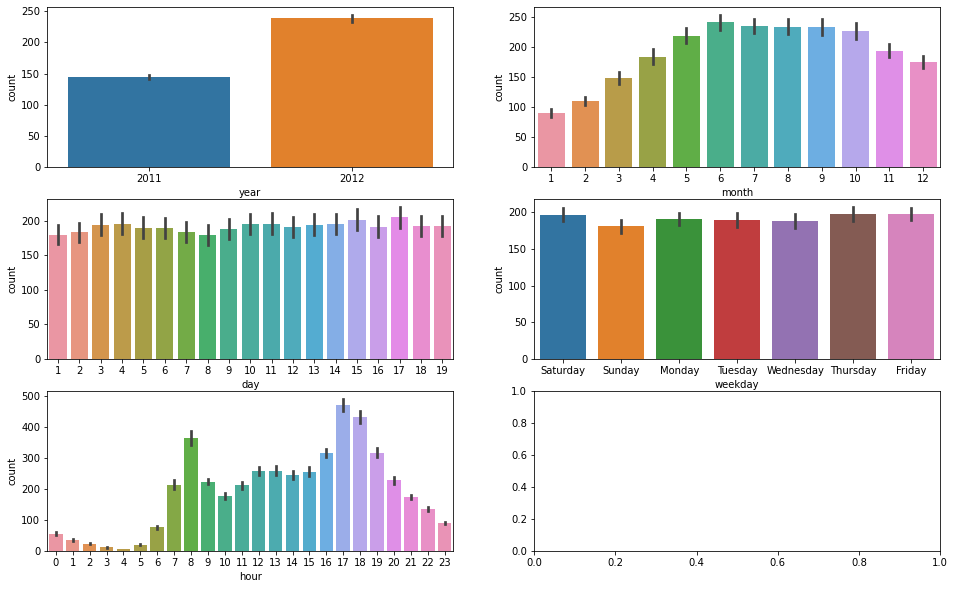

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,10))
sns.barplot(data=train, x='year', y='count', ax = axes[0][0])
sns.barplot(data=train, x='month', y='count', ax = axes[0][1])
sns.barplot(data=train, x='day', y='count', ax = axes[1][0])
sns.barplot(data=train, x='weekday', y='count', ax = axes[1][1])
sns.barplot(data=train, x='hour', y='count', ax = axes[2][0])
# sns.barplot(data=train, x='minute', y='count', ax = axes[2][1])

<AxesSubplot:xlabel='month', ylabel='count'>

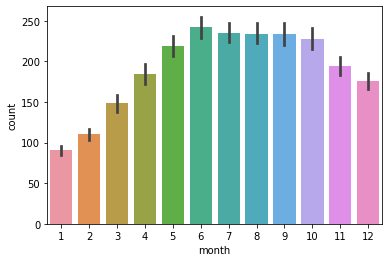

In [34]:
sns.barplot(data=train, x='month', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

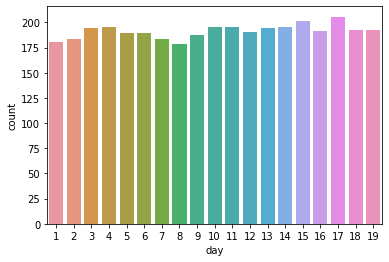

In [42]:
sns.barplot(data=train.groupby('day')['count'].mean().reset_index(),
            x='day', y='count')

<AxesSubplot:xlabel='day', ylabel='count'>

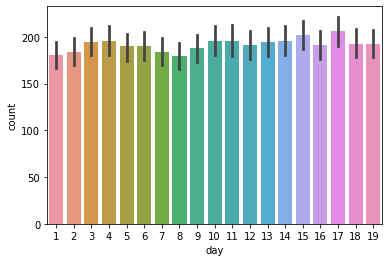

In [59]:
sns.barplot(data=train, x='day', y='count')

### 4.3 대여 시간대를 제외한 다른 범주형 데이터(계절, 날씨, 공휴일여부 등)에 따른 자전거 대여율

In [53]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [65]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


<AxesSubplot:xlabel='holiday', ylabel='count'>

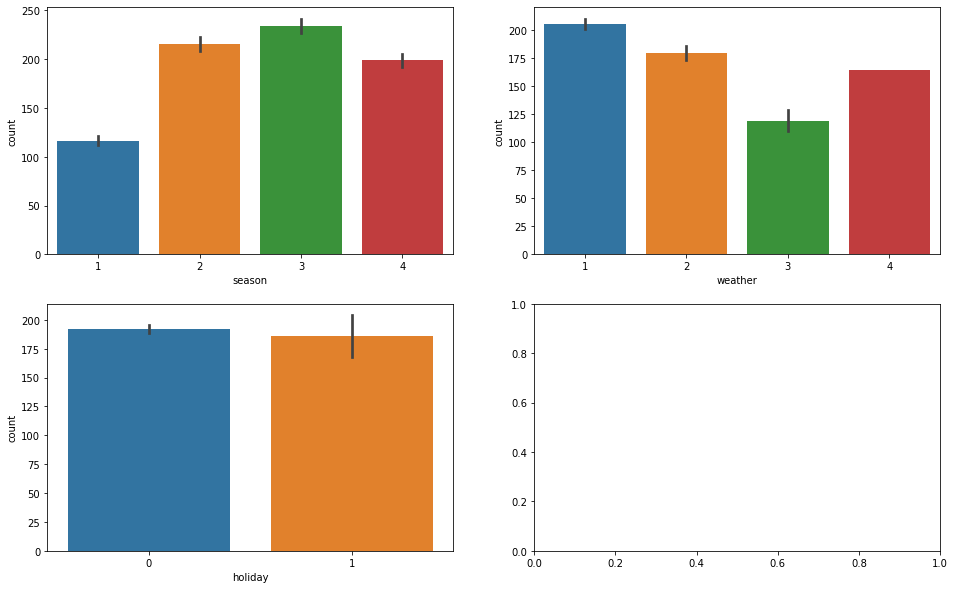

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
sns.barplot(data=train, x='season', y='count', ax=axes[0][0])
sns.barplot(data=train, x='weather', y='count', ax=axes[0][1])
sns.barplot(data=train, x='holiday', y='count', ax=axes[1][0])

### 4.4 위의 범주형 데이터(계절, 날씨, 공휴일 여부 등)의 사분위 분포 확인

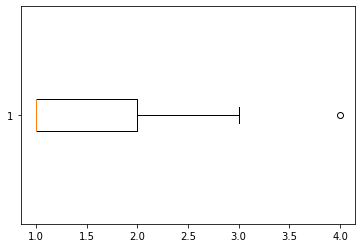

In [64]:
plt.boxplot(train['weather'], vert=False)
plt.show()

- 공휴일이 아닐 때 특잇값(outlier)가 많음
- 근무일일 때 특잇값이 많음
- 가을(Fall, 3)에 대여량이 많음
- 날씨가 좋을수록 대여량이 많음
- 악천후 속 자전거 대여수 한건(특잇값)데 대해 제거 고려

### 4.5 시간대별 자건거 대여율을 추가 정보와 함께 보기
추가정보 : 공휴일여부

* 근무일에는 출퇴근 시간에 대여량이 많고
* 쉬는날에는 오후 12~2시 사이에 대여량이 많음

### 4.6 상관관계
수치형 데이터 간 상관관계를 파악하기 위해 산점도 그래프(회귀선 포함한) 그리기

- **(1)** 온도, 체감온도, 습도, 풍속별 대여 수량 산점도 그래프('temp', 'atemp', 'humidity', 'windspeed')

- **(2)** 상관계수

**선형회귀에서 다중공선성 문제(Multicollinearity in Regression)**
- https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
- temp와 atemp가 상관관계가 높으므로 원하는 coef값이 나오지 않을 수 있음
- 두 특성 모두 예측변수에 양의 상관관계가 있으므로 coef가 양수값이 나오길 기대하지만
- 다중 선형회귀에선느 이 값이 바뀔 수 있음

## 5. 데이터 전처리

훈련 데이터와 테스트 데이터를 준비하는 방법
1. 훈련 데이터에 대한 전처리를 해준 뒤, 동일한 방법으로 테스트 데이터에 적용한다.
2. 훈련 데이터와 테스트 데이터를 합쳐서 모든 전처리가 끝난 뒤, 분리한다.

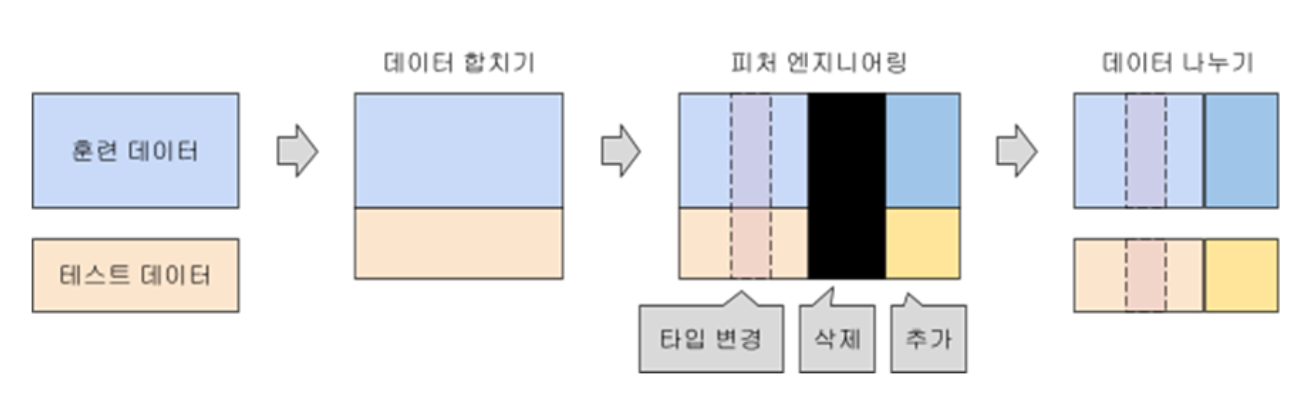

In [1]:
from IPython.display import Image
Image('./images/img5.png')

### 5.1 이상치 제거

### 5.2 훈련 데이터와 테스트 데이터 합치기

### 5.3 datetime으로부터 파생특성 추가(특성 공학, feature engineering)

### 5.4 필요없는 특성 제거

* 탐색적 데이터 분석에서 얻은 인사트를 활용해 의미있는 특성과 불필요한 특성을 구분(특성 선택)
- 특성이 많다고 무조건 좋은게 아님
- 예측 성능을 높이려면 타기값과 관련있는 특성이 필요
- 탐색적 데이터 분석, 상관관계 매트릭스 등의 배경지식을 종합적으로 활용해 판단해야 함
- 모델링 과정에서 특성 중요도(Tree model), 회귀 계수등을 참고해 볼 수 있음

### 5.5 훈련 데이터와 테스트 데이터 나누기

## 6. 평가지표 계산 함수 작성

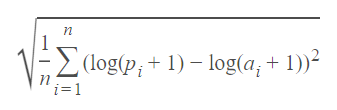

In [2]:
Image('./images/img6.png')

## 7. 모델 선택과 훈련

## 8. 모델 세부 튜닝

## 9.모델 예측과 성능 평가

# 더 해볼만한것!